# Dataset Statistics

In [12]:
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

import sys

sys.path.insert(0, "..")
import plotting_utils
from plotting_utils import config
from tueplots import figsizes

config.experiment_name = "dataset_statistics"
config.target = "nyu"
config.debug_mode = True

plt.rcParams.update(config.tueplots_bundle())

# Data Wrangling
import pandas as pd


In [13]:
from data import data_cleaning

##  Training data tabular
# data_df = data_cleaning.create_feature_df()
data_df = pd.read_csv("../../raw_data/tables/features.csv")
data_df

,Brand_Name,Brand_ID,Model_Name,Model_ID,Bodytype,Launch_Year,Color,Advertiser_ID,Image_ID,Viewpoint,file_path
0,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,1,image_1.jpg,45,Abarth$$124 Spider$$2017$$Blue$$2_1$$1$$image_...
1,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,10,image_11.jpg,45,Abarth$$124 Spider$$2017$$Blue$$2_1$$10$$image...
2,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,10,image_16.jpg,0,Abarth$$124 Spider$$2017$$Blue$$2_1$$10$$image...
3,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,10,image_18.jpg,270,Abarth$$124 Spider$$2017$$Blue$$2_1$$10$$image...
4,Abarth,2,124 Spider,2_1,Convertible,2017,Blue,10,image_2.jpg,180,Abarth$$124 Spider$$2017$$Blue$$2_1$$10$$image...
...,...,...,...,...,...,...,...,...,...,...,...
271318,Zenos,99,E10,99_1,Convertible,2016,Grey,3,image_7.jpg,90,Zenos$$E10$$2016$$Grey$$99_1$$3$$image_7.jpg
271319,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_0.jpg,225,Zenos$$E10$$2016$$Red$$99_1$$1$$image_0.jpg
271320,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_3.jpg,315,Zenos$$E10$$2016$$Red$$99_1$$1$$image_3.jpg
271321,Zenos,99,E10,99_1,Convertible,2016,Red,1,image_4.jpg,45,Zenos$$E10$$2016$$Red$$99_1$$1$$image_4.jpg


## Dataset splits

In [14]:
from data.data_splitting import split_dataset_dfs

train_df, val_df, test_df = split_dataset_dfs("../../raw_data/tables/features.csv")

#### Dataset exploration:
- How are car brands distributed over the years in each dataset (val, test, train)?
- How are years distributed per brand?

In [15]:
# group by year
# count brands

# calculate number of images per year


def get_images_by_year(data: pd.DataFrame):
    return data.groupby(["Launch_Year"])["file_path"].count()


def get_images_by_viewpoint(data: pd.DataFrame):
    return data.groupby(["Viewpoint"])["file_path"].count()


# number of images by year and viewpoint for each dataset
# years
num_images_by_year_train_df = get_images_by_year(train_df)
num_images_by_year_test_df = get_images_by_year(test_df)
num_images_by_year_val_df = get_images_by_year(val_df)
# viewpoints
num_images_by_viewpoint_train_df = get_images_by_viewpoint(train_df)
num_images_by_viewpoint_test_df = get_images_by_viewpoint(test_df)
num_images_by_viewpoint_val_df = get_images_by_viewpoint(val_df)


def plot_dataframes(df: pd.DataFrame, df_name: str, plot_type: str = "bar"):
    df.plot(
        kind="bar",
        title=f"Number of Images by Year in {df_name}",
        xlabel="Years",
        ylabel="Counts",
    )

In [16]:
train_df.groupby(["Viewpoint"])["file_path"].count()

Viewpoint
0      30289
45     17062
90     23490
135    15281
180    27271
225    24030
270    16434
315    17766
Name: file_path, dtype: int64

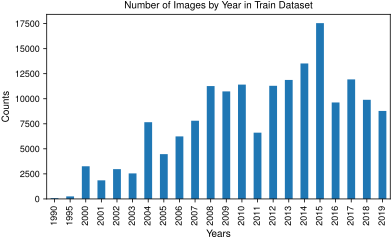

In [17]:
with plt.rc_context(config.tueplots_bundle(rel_width=1.0)):
    df_name = "Train Dataset"
    plot_dataframes(num_images_by_year_train_df, df_name=df_name)

    plotting_utils.savefig(
        f"Statistics_{df_name}",
        extension="pdf",
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.01,
    )

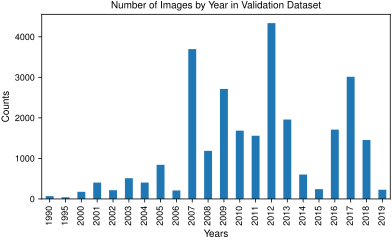

In [18]:
with plt.rc_context(config.tueplots_bundle(rel_width=1.0)):
    df_name = "Validation Dataset"
    plot_dataframes(num_images_by_year_val_df, df_name=df_name)

    plotting_utils.savefig(
        f"Statistics_{df_name}",
        extension="pdf",
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.01,
    )

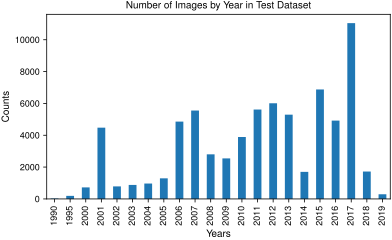

In [19]:
with plt.rc_context(config.tueplots_bundle(rel_width=1.0)):
    df_name = "Test Dataset"
    plot_dataframes(num_images_by_year_test_df, df_name=df_name)

    plotting_utils.savefig(
        f"Statistics_{df_name}",
        extension="pdf",
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.01,
    )

In [20]:
# plot stacked number of images by year per dataset

# combine num_images_by_year_some_dataset dfs to one dataframe
num_images_by_year_all_data = num_images_by_year_train_df.to_frame().join(
    num_images_by_year_test_df.to_frame(),
    on="Launch_Year",
    lsuffix="_train",
    rsuffix="_test",
)
num_images_by_year_all_data = num_images_by_year_all_data.join(
    num_images_by_year_val_df.to_frame(), on="Launch_Year", rsuffix="_val"
)
num_images_by_year_all_data = num_images_by_year_all_data.rename(
    columns={
        "file_path_test": "Num Test Images",
        "file_path_train": "Num Train Images",
        "file_path": "Num Validation Images",
    }
)
num_images_by_year_all_data

,Num Train Images,Num Test Images,Num Validation Images
Launch_Year,,,
1990,75,27,68
1995,252,191,41
2000,3259,725,175
2001,1855,4475,403
2002,2971,788,215
2003,2548,879,511
2004,7659,965,405
2005,4472,1291,842
2006,6238,4856,208


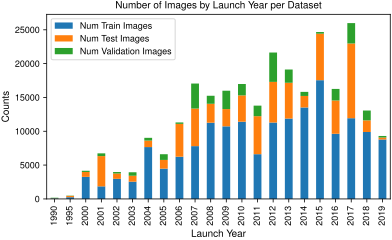

In [23]:
with plt.rc_context(config.tueplots_bundle(rel_width=1.0)):
    num_images_by_year_all_data.plot.bar(
        stacked=True,
        xlabel="Launch Year",
        ylabel="Counts",
        title="Number of Images by Launch Year per Dataset",
    )

    plotting_utils.savefig(
        f"Statistics_all_Datasets_year",
        extension="pdf",
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.01,
    )

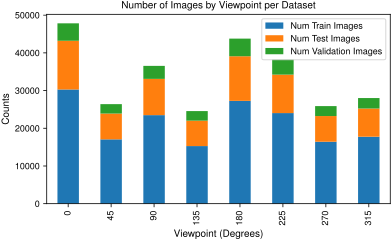

In [22]:
# plot stacked number of images by year per dataset

# combine num_images_by_viewpointsome_dataset dfs to one dataframe
num_images_by_viewpoint_all_data = num_images_by_viewpoint_train_df.to_frame().join(
    num_images_by_viewpoint_test_df.to_frame(),
    on="Viewpoint",
    lsuffix="_train",
    rsuffix="_test",
)
num_images_by_viewpoint_all_data = num_images_by_viewpoint_all_data.join(
    num_images_by_viewpoint_val_df.to_frame(), on="Viewpoint", rsuffix="_val"
)
num_images_by_viewpoint_all_data = num_images_by_viewpoint_all_data.rename(
    columns={
        "file_path_test": "Num Test Images",
        "file_path_train": "Num Train Images",
        "file_path": "Num Validation Images",
    }
)
num_images_by_viewpoint_all_data

with plt.rc_context(config.tueplots_bundle(rel_width=1.0)):
    num_images_by_viewpoint_all_data.plot.bar(
        stacked=True,
        xlabel="Viewpoint (Degrees)",
        ylabel="Counts",
        title="Number of Images by Viewpoint per Dataset",
    )

    plotting_utils.savefig(
        f"Statistics_all_Datasets",
        extension="pdf",
        dpi=300,
        bbox_inches="tight",
        pad_inches=0.01,
    )